<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #AABCBB> <font size = 4>I.F. Karen Violeta García Hernandez - if707178@iteso.mx </font>

<center><font color=#50C8C4><font size=5> Laboratorio 1: Trading Manual </font> <br> <br>

<center> <font color= #004A94 > <font size = 4> Primavera 2020 </font>  |  <font color= #004A94> <font size = 4> Repositorio: <a href='https://github.com/violetarcia/LAB_01_KVGH.git'>Link</a></font>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Resumen </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> En este laboratorio se dedicará a hacer trading manual utilizando alguna herramienta para la toma de decisión (comprar o vender) </p>

---

<div style="text-align:center"><span style="color:#50C8C4; font-family:Georgia; font-size:2.2em;"> Código </span></div>

<p style = "font-family: Calibri Light; font-size:1.3em;color:black; LINE-HEIGHT:25px"> A continuación se desglosa el código con el cual se analizan varias divisa. Primero se empieza importando paqueterías y archivos que nos serán útiles</p>

In [1]:
import funciones as fn                              # Para procesamiento de datos
import pandas as pd                                 # Procesamiento de datos
import matplotlib.pyplot as plt                     # Visualizar graficas básicas
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.metrics import r2_score

In [2]:
# Lista de divisas que me gustaria analizar
instrument = ['EUR_USD', 'GBP_USD', 'NZD_USD', 'AUD_USD', 'USD_JPY',
              'USD_CNH', 'USD_SGD', 'USD_HUF', 'USD_HKD', 'USD_CZK',
              'USD_CAD', 'USD_MXN', 'USD_DKK', 'USD_CHF', 'USD_SEK']
pd.set_option('display.max_rows', 8)


In [3]:
'''Función Divisa
         Obtener los precios especificando el instrumento
         
         Parametro: el instrumento. (Ejem: 'EUR_USD')
        
        Para cambiar las fechas es necesario hacerlo desde la función
'''
def Divisa(ins, gran):
    OA_Ak = '800f1b3f91d7cb0a713c532e17823f6d-f9acd6a21490f97aef649dfd8e723435'
    OA_Gn = gran                                                    # Granularidad
    fini = pd.to_datetime("2019-02-02 14:00:00").tz_localize('GMT')  # Fecha inicial
    ffin = pd.to_datetime("2020-02-19 14:00:00").tz_localize('GMT')  # Fecha final
    
    # Descargar precios masivos
    df = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn, p3_inst=ins, p4_oatk=OA_Ak, p5_ginc=4900)
    
    return df

def Close(df):
    return df['Close']

In [4]:
# Utilizar la funcion para la lista de divisas [OHLC] de las cuales se requieren los precios de cierre
Data_day = [Divisa(ins, 'D') for ins in instrument]

# Precios

In [5]:
# Se acomoda la lista en un solo DataFrame
closes = pd.DataFrame([Close(Data_day[i]) for i in range(len(Data_day))]).transpose()
closes.columns = instrument

# En el siguiente DF estan los precios de cierre (de acuerdo a la temporalidad y el plazo que se escogió) 
closes

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,1.14562,1.30798,0.68939,0.72488,109.502,6.75699,1.35048,277.150,7.84704,22.45174,1.31007,19.10412,6.51690,0.99555,9.05163
1,1.14344,1.30380,0.68864,0.72246,109.935,6.77767,1.35297,277.706,7.84665,22.46292,1.31134,19.11134,6.52850,0.99816,9.10512
2,1.14128,1.29556,0.68950,0.72355,109.947,6.76512,1.35144,278.326,7.84560,22.52760,1.31322,19.05142,6.54068,0.99988,9.11360
3,1.13684,1.29364,0.68300,0.71185,109.950,6.77715,1.35544,280.258,7.84644,22.68880,1.32042,19.05989,6.56568,1.00190,9.19824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.08374,1.30485,0.64328,0.67152,109.782,6.99256,1.39263,309.562,7.76746,22.96200,1.32493,18.54562,6.89356,0.98194,9.71676
324,1.08310,1.30464,0.64348,0.67139,109.781,6.99337,1.39233,309.725,7.76806,22.95406,1.32518,18.54264,6.89699,0.98222,9.72342
325,1.08334,1.30022,0.64402,0.67172,109.926,6.98344,1.38922,309.853,7.76826,22.91894,1.32328,18.55623,6.89572,0.98092,9.69433
326,1.07960,1.30003,0.63867,0.66888,109.858,7.00708,1.39224,310.686,7.76800,23.12041,1.32579,18.58952,6.91886,0.98284,9.77688


# Visualizar

Ver si en el periodo que se escogio sólo ha subido, o sólo ha bajado. Tener una idea de como se ven las series de tiempo

In [6]:
# Linea de Regresion Lineal
def Regresion_L(x, y):
    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)
    
    # Grafica
    ax.plot(x, y_hat, "r--")

    text = f"$y={z[0]:0.5f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
    ax.text(0, 0.99, text,transform=ax.transAxes, fontsize=8, verticalalignment='bottom')
    return z[0], z[1]


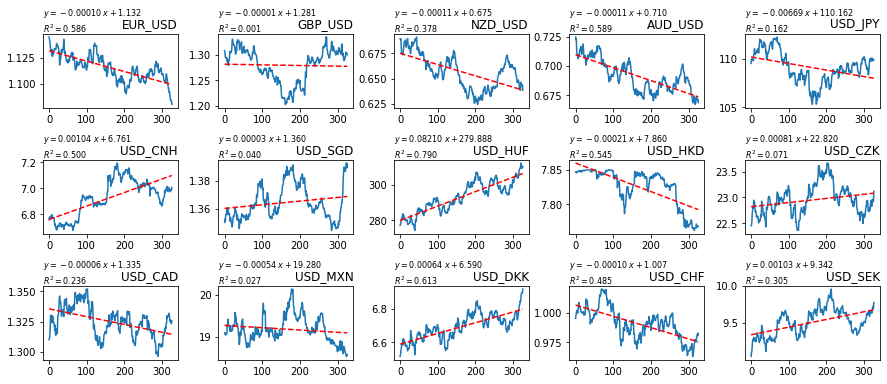

In [7]:
# Graficas
x = np.arange(len(closes))
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

for ax, d in zip(axs.ravel(), data):
    ax.plot(x, closes.iloc[:,d])
    Regresion_L(x, closes.iloc[:,d])
    ax.set_title(instrument[d], loc = 'right')

In [8]:
# Calcular la matriz de coefecientes de correlacion
corr = closes.corr()

# Visualizarlo
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
EUR_USD,1,0.29,0.81,0.84,0.35,-0.74,-0.6,-0.95,0.36,-0.73,0.043,-0.13,-1,0.27,-0.84
GBP_USD,0.29,1,0.53,0.47,0.78,-0.58,-0.72,-0.23,-0.22,-0.59,0.0013,-0.61,-0.26,0.14,-0.52
NZD_USD,0.81,0.53,1,0.88,0.61,-0.89,-0.71,-0.8,0.071,-0.78,-0.0073,-0.39,-0.8,0.21,-0.92
AUD_USD,0.84,0.47,0.88,1,0.65,-0.88,-0.7,-0.86,0.34,-0.63,0.096,-0.28,-0.84,0.48,-0.86
USD_JPY,0.35,0.78,0.61,0.65,1,-0.81,-0.57,-0.41,0.077,-0.46,0.31,-0.55,-0.34,0.55,-0.53
USD_CNH,-0.74,-0.58,-0.89,-0.88,-0.81,1,0.65,0.77,-0.19,0.69,-0.24,0.46,0.73,-0.47,0.8
USD_SGD,-0.6,-0.72,-0.71,-0.7,-0.57,0.65,1,0.48,0.14,0.73,0.33,0.5,0.58,-0.046,0.73
USD_HUF,-0.95,-0.23,-0.8,-0.86,-0.41,0.77,0.48,1,-0.53,0.6,-0.22,0.026,0.96,-0.45,0.78
USD_HKD,0.36,-0.22,0.071,0.34,0.077,-0.19,0.14,-0.53,1,0.28,0.55,0.57,-0.39,0.71,-0.042
USD_CZK,-0.73,-0.59,-0.78,-0.63,-0.46,0.69,0.73,0.6,0.28,1,0.26,0.61,0.71,0.12,0.8


In [9]:
resume_clos = closes.describe()
resume_clos

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,1.115564,1.279386,0.656922,0.691777,109.072226,6.929689,1.364668,293.270483,7.826276,22.951510,1.325014,19.191152,6.694309,0.991248,9.509760
std,0.012567,0.033325,0.017155,0.013583,1.568944,0.138720,0.012242,8.733747,0.026517,0.285858,0.012477,0.313670,0.077186,0.013055,0.176487
min,1.079600,1.202800,0.624610,0.667350,105.315000,6.676630,1.344840,274.285000,7.762320,22.360400,1.296340,18.542640,6.516900,0.963110,9.051630
25%,1.106935,1.254585,0.641880,0.679930,108.112000,6.823835,1.355215,286.219500,7.814725,22.732740,1.315910,18.986370,6.639440,0.981900,9.361730
50%,1.115300,1.290250,0.658740,0.690020,108.892000,6.938740,1.361460,293.788000,7.838760,22.930440,1.325300,19.139710,6.695380,0.991680,9.518100
75%,1.124540,1.305030,0.669755,0.702100,109.999000,7.041270,1.374935,300.413500,7.846050,23.122260,1.332915,19.387280,6.746650,0.999900,9.643045
max,1.145620,1.334640,0.691180,0.724880,112.202000,7.194680,1.392630,312.592000,7.850050,23.668170,1.351790,20.145020,6.918860,1.020580,9.955680


# Conteo de Velas

Más estadistico

La granularidad mas pequeña se vuelve mas caotico, analisis tecnico funciona mas en periodicidades de una hora


In [10]:
# Función que recupera los precios de apertura
def Open(df):
    return df['Open']

# Importante: Open y Close son arrays del mismo tamaño (HandleExcepcion)
def Tendency(Open, Clos):
    tendencia = ['alcista' if Clos[i] >= Open[i] else 'bajista' for i in range(len(Open))]
    return tendencia

In [11]:
# Se necesitan tanto precio de cierre, como de apertura para poder decir si fue alcista o bajista el dia, en este caso
opens = pd.DataFrame([Open(Data_day[i]) for i in range(len(Data_day))]).transpose()
# Nombres de las divisas utilizadas
opens.columns = instrument

# Utilizar funcion de tendencia en los instrumentos
tendencia = pd.DataFrame([Tendency(opens.iloc[:,i], closes.iloc[:,i]) for i in range(len(opens.columns))]).transpose()
tendencia.columns = instrument
tendencia

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,bajista,bajista,bajista,bajista,bajista,alcista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,alcista,bajista
1,bajista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,bajista,alcista,alcista,alcista,alcista,alcista,alcista
2,bajista,bajista,alcista,alcista,alcista,bajista,bajista,alcista,bajista,alcista,alcista,bajista,alcista,alcista,alcista
3,bajista,bajista,bajista,bajista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista,alcista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,bajista,alcista,bajista,bajista,alcista,alcista,alcista,bajista,bajista,alcista,bajista,bajista,alcista,alcista,alcista
324,bajista,bajista,alcista,bajista,bajista,alcista,bajista,alcista,alcista,bajista,alcista,bajista,alcista,alcista,alcista
325,bajista,bajista,bajista,bajista,alcista,bajista,bajista,alcista,alcista,bajista,bajista,alcista,alcista,bajista,bajista
326,bajista,bajista,bajista,bajista,bajista,alcista,alcista,alcista,bajista,alcista,alcista,alcista,alcista,alcista,alcista


In [12]:
''' Función Consecutively

    Función para ver la cosecutividad de la tendencia
    
    Parámetro: tendencia. Vector que sólo contiene 'alcista' o 'bajista'
''' 

def Consecutively(tendencia):
    count = [0]
    
    def conteo(count, a, b):
        if a == b:
            if a is 'alcista':
                count += 1
            else:
                count -= 1
        else:
            count = 0
        return  count
    
    temp = [count.append(conteo(count[i], tendencia[i], tendencia[i+1])) for i in range(len(tendencia)-1)]
    return count

In [13]:
# Utilizando la funcion anterior, te regresa el numero consecutivo que se ha acumulado antes de que cambie de tendencia
consecut = pd.DataFrame([Consecutively(tendencia.iloc[:,i]) for i in range(len(tendencia.columns))]).transpose()
consecut.columns = instrument
consecut

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,0,1,0,0,-1,1,1,1,1,1,0
2,-2,-2,0,0,1,0,0,1,-2,2,2,0,2,2,1
3,-3,-3,0,0,2,0,0,2,0,3,3,0,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-2,5,-1,-1,0,2,2,-1,-1,2,0,-5,2,2,2
324,-3,0,0,-2,0,3,0,0,0,0,0,-6,3,3,3
325,-4,-1,0,-3,0,0,-1,1,1,-1,0,0,4,0,0
326,-5,-2,-1,-4,0,0,0,2,0,0,0,1,5,0,0


De estos ver el máximo de dias que estuvo alcista y bajista

In [14]:
# Ver cual es el maximo de dias que cada divisa estuvo subiendo consecutivamante y cuantos bajando
df_consecut = pd.DataFrame(index = instrument, columns = ['Maximo_Alcista', 'Maximo_Bajista'])

df_consecut['Maximo_Alcista'] = [consecut.iloc[:,i].max() for i in range(len(consecut.columns))]
df_consecut['Maximo_Bajista'] = [consecut.iloc[:,i].min() for i in range(len(consecut.columns))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_consecut)

         Maximo_Alcista  Maximo_Bajista
EUR_USD               4              -7
GBP_USD               7             -11
NZD_USD               7              -5
AUD_USD               5              -7
USD_JPY               8              -4
USD_CNH               5              -4
USD_SGD               8              -7
USD_HUF               6              -5
USD_HKD               6              -4
USD_CZK              10              -6
USD_CAD               6              -5
USD_MXN               4              -8
USD_DKK               7              -4
USD_CHF               7              -5
USD_SEK               5              -9


# Graficas de Histogramas


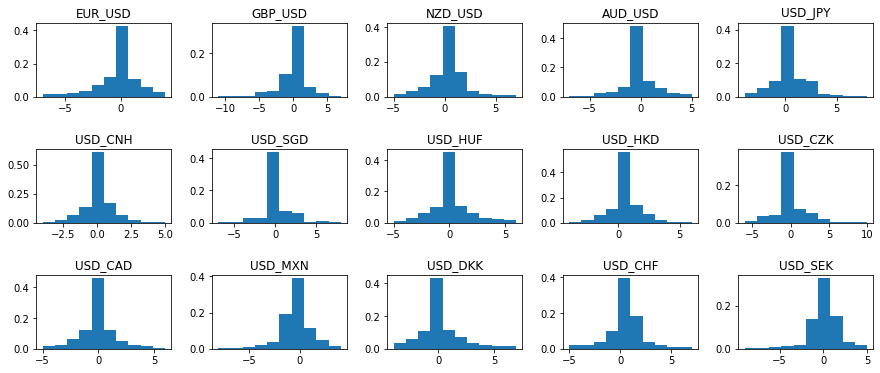

In [15]:
fig, axs = plt.subplots(3,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .7, wspace=.3)

data = np.arange(len(closes.columns))

for ax, d in zip(axs.ravel(), data):
    ax.hist(consecut.iloc[:,d], density = True)
    ax.set_title(instrument[d], loc = 'center')


EJEMPLO

In [16]:
#Ejemplo, ver cuantas veces se repitió más de 3 veces
mas_tres = pd.DataFrame([len([1 for x in range(len(consecut)) if abs(consecut.iloc[:,i][x]) >= 3]) 
                     for i in range(len(consecut.columns))]).rename(index = lambda x: instrument[x])

# En porcentaje
mas_tres_p = mas_tres/len(tendencia)*100
mas_tres_p.columns = ['En %']

# Ver el dataframe completo 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(mas_tres_p.sort_values(by = 'En %'))


              En %
USD_CNH   6.116208
USD_HKD   6.727829
USD_CAD  10.091743
USD_JPY  11.009174
USD_MXN  11.009174
USD_SGD  11.620795
NZD_USD  13.149847
USD_HUF  13.455657
USD_SEK  13.455657
EUR_USD  13.761468
USD_DKK  14.373089
AUD_USD  14.678899
USD_CZK  14.678899
USD_CHF  14.984709
GBP_USD  17.125382


Entonces podemos decir que el ultimo 'GBP_USD' mantuvo mayor consistencia en consecutividad, ya que 16% de las veces fue 3 o mayor las veces que se repitió (Ya sea bajista o alcista) 

# Fechas (Dias)


In [17]:
def TimeStamp(df):
    return df['TimeStamp']

time = pd.DataFrame([TimeStamp(Data_day[i]) for i in range(len(Data_day))]).transpose()
time.columns = instrument

Debido a que la función de Divisa solo se marca un periodo de fechas y este se utiliza para todas las divisas, es evidente que compartiran todas el mismo tiempo, lo cual hace posible una mejor comparación. 

In [18]:
#day = pd.DataFrame([[time.iloc[i, j].weekday() for i in range(len(time))] for j in range(len(time.columns))]).transpose()
day = pd.DataFrame([time.iloc[i, 0].weekday() for i in range(len(time))])


In [29]:
consecut['Days'] = day

cons_day = [consecut.groupby('Days')[i].value_counts().unstack(level = -1).fillna(0) for i in instrument]

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(cons_day[0])

EUR_USD   -7   -6   -5   -4   -3   -2   -1     0     1    2    3    4
Days                                                                 
0        1.0  0.0  1.0  0.0  1.0  5.0  8.0  25.0   9.0  3.0  2.0  0.0
1        0.0  0.0  0.0  0.0  3.0  5.0  9.0  29.0   2.0  4.0  0.0  2.0
2        0.0  0.0  0.0  2.0  3.0  4.0  8.0  27.0   7.0  2.0  1.0  0.0
3        0.0  0.0  2.0  3.0  2.0  5.0  6.0  18.0  10.0  5.0  2.0  1.0
4        0.0  2.0  3.0  1.0  3.0  4.0  4.0  27.0   5.0  4.0  1.0  1.0
6        1.0  2.0  1.0  2.0  1.0  2.0  8.0  27.0   6.0  4.0  1.0  0.0


In [20]:
#Para que tengas la misma dimension todas las divisas
temp = pd.concat([cons_day[i] for i in range(len(cons_day))], axis=0).fillna(0)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    #print(temp.iloc[0:6,:])

In [21]:
#Verlo en porcentaje
cons_day_porc = [round(consecut.groupby('Days')[i].value_counts().unstack(level = -1).fillna(0)/len(tendencia), 2)*1
                 for i in instrument]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#    print(cons_day_porc[0])

# Probabilidad

Empezar con lo basico, simplemente viendo la probabilida dado el dia de que sea alcista, o bajista

In [22]:
# Crear una copia de la tencia 'alcista' o 'bajista'
tendency = tendencia.copy()

# Hacerlo booleano [0,1]
tendency.replace(to_replace = ['alcista', 'bajista'], value = [1, 0], inplace=True)

# Visualizar la media: si son negativos, tuvieron mas tendencia 'bajista'
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tendency.mean()-0.5)

EUR_USD   -0.047401
GBP_USD   -0.035168
NZD_USD   -0.010703
AUD_USD   -0.019878
USD_JPY    0.038226
USD_CNH    0.025994
USD_SGD    0.013761
USD_HUF    0.016820
USD_HKD    0.019878
USD_CZK    0.001529
USD_CAD    0.004587
USD_MXN   -0.050459
USD_DKK    0.044343
USD_CHF    0.050459
USD_SEK    0.013761
dtype: float64


In [23]:
# Agregar la columna de dias, para ver en que dias subio, y en cuales bajo
tendency['Days'] = day

# Agrupar de acuerdo al dia y ver el porcentaje de probabilidad
tend_day = [round(tendency.groupby('Days')[i].value_counts().unstack(level = -1)/len(tendency),3) for i in instrument]

# Acomodarlo en un mismo DataFrame
tend_day = pd.concat([tend_day[i] for i in range(len(tend_day))], axis=1)

# Nombre de columnas para diferenciar divisas y tendencia
tend_day.columns = np.array([[(stri + "% d")%d for d in range(2)] for stri in instrument]).flatten() 

tend_day

,EUR_USD 0,EUR_USD 1,GBP_USD 0,GBP_USD 1,NZD_USD 0,NZD_USD 1,AUD_USD 0,AUD_USD 1,USD_JPY 0,USD_JPY 1,...,USD_CAD 0,USD_CAD 1,USD_MXN 0,USD_MXN 1,USD_DKK 0,USD_DKK 1,USD_CHF 0,USD_CHF 1,USD_SEK 0,USD_SEK 1
Days,,,,,,,,,,,,,,,,,,,,,
0,0.095,0.073,0.083,0.086,0.080,0.089,0.092,0.076,0.080,0.089,...,0.086,0.083,0.086,0.083,0.067,0.101,0.073,0.095,0.089,0.080
1,0.101,0.064,0.086,0.080,0.092,0.073,0.101,0.064,0.070,0.095,...,0.067,0.098,0.095,0.070,0.064,0.101,0.067,0.098,0.086,0.080
2,0.086,0.080,0.095,0.070,0.092,0.073,0.098,0.067,0.092,0.073,...,0.083,0.083,0.086,0.080,0.080,0.086,0.067,0.098,0.067,0.098
3,0.080,0.086,0.086,0.080,0.076,0.089,0.067,0.098,0.095,0.070,...,0.089,0.076,0.104,0.061,0.086,0.080,0.095,0.070,0.089,0.076
4,0.107,0.061,0.086,0.083,0.073,0.095,0.067,0.101,0.073,0.095,...,0.089,0.080,0.113,0.055,0.070,0.098,0.061,0.107,0.083,0.086
6,0.080,0.089,0.101,0.067,0.098,0.070,0.095,0.073,0.052,0.116,...,0.083,0.086,0.067,0.101,0.089,0.080,0.086,0.083,0.073,0.095


In [28]:
# Comparar si la probabilidad de alcista es mayor a la de bajista, comprar.
def compare(bajista, alcista):
    if alcista > bajista:
        return 'comprar'
    else:
        return 'vender'

temp = pd.DataFrame([[compare(tend_day.iloc[j,i], tend_day.iloc[j,i+1]) 
         for i in range(0, len(tend_day.columns), 2)]for j in range(len(tend_day))])

temp.columns = instrument
temp

,EUR_USD,GBP_USD,NZD_USD,AUD_USD,USD_JPY,USD_CNH,USD_SGD,USD_HUF,USD_HKD,USD_CZK,USD_CAD,USD_MXN,USD_DKK,USD_CHF,USD_SEK
0,vender,comprar,comprar,vender,comprar,vender,comprar,comprar,comprar,vender,vender,vender,comprar,comprar,vender
1,vender,vender,vender,vender,comprar,vender,comprar,comprar,vender,comprar,comprar,vender,comprar,comprar,vender
2,vender,vender,vender,vender,vender,vender,comprar,comprar,vender,comprar,vender,vender,comprar,comprar,comprar
3,comprar,vender,comprar,comprar,vender,vender,vender,vender,comprar,vender,vender,vender,vender,vender,vender
4,vender,vender,comprar,comprar,comprar,comprar,comprar,vender,comprar,vender,vender,vender,comprar,comprar,comprar
5,comprar,vender,vender,vender,comprar,comprar,vender,vender,comprar,comprar,comprar,comprar,vender,vender,comprar


# Teorema de Bayes

Expresa la probabilidad condicional de un evento aleatorio A dado B en términos de la distribución de probabilidad condicional del evento B dado A y la distribución de probabilidad marginal de solo A.

$ P(A_{i}|B)={\frac {P(B|A_{i})P(A_{i})}{P(B)}}$

- $P(A_i)$ son las probabilidades a priori
- $P(B|A_i)$ es la probabilidad de $B$ en la hipótesis $A_i$ likelihood, la forma de incluir nuestros datos en el análisis
- $P(A_{i}|B)$ son las probabilidades a posteriori.

In [ ]:
# Ejemplo simple teorema de Bayes aplicado a estimación de un sólo parámetro.
# EL test dio positivo
a_priori = 0.003  # 0.3% de la población tiene tal enfermedad
likelihood = 0.99 # 99% de efectividad de la prueba
evidencia = 0.01  # 1% de falsos positivos

a_posteriori = likelihood * a_priori / evidencia
a_posteriori # Probabilidad de tener la nefermedad

# Cuando nuestra a priori es fuerte, puede ser sorprendentemente resistente frente a nuevas evidencias.



| Dia     | Alcista | Bajista| 
| ---     | :-: | :-: |
|Lunes    | p(A ! L) | p(B ! L) |
|Martes   | p(A ! M) | p(B ! M) |
|Miercoles| p(A ! M) | p(B ! M) |
|Jueves   | p(A ! J) | p(B ! J) |
|Viernes  | p(A ! V) | p(B ! V) |
|Sabado   | p(A ! S) | p(B ! S) |



- [Optimización Bayesiana]('https://github.com/fmfn/BayesianOptimization')
